## CIS 4526 Sp23 EDA Review Exercise

In [1]:
car_crash = "/kaggle/input/sp23-eda/car_crashes2.csv"
mpg3 = '/kaggle/input/sp23-eda/mpg3.csv'

### This Review Exercise will cover the following skills set
* Using sql 
* Checking for null values and outliers
* Calculate simple statistics using both SQL and Pandas 
* Calculate skew and correlation
* Basic Data Visualization
* How to fix missing values

**Make sure you have pandasql installed. If not, make sure you run the code in the following cell**

In [2]:
import os
try:
    import pandasql as ps
except:
    print("Failed in import pandasql")
    os.system("pip install pandasql")

**Import all standard libaries**

In [3]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Car Crashes dataset ##

In [4]:
crash = pd.read_csv(car_crash)
print(crash.shape)
crash.head()

(52, 10)


,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,South,East South Central
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,West,Pacific
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,West,Mountain
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,South,West South Central
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,West,Pacific


* accidents is the total number of crashes for each state
* speeding is the average speeding in each state

In [5]:
crash.describe()

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,52.000000,51.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,15.817308,5.060235,5.574385,13.648154,14.043558,887.323654,134.865577
std,4.086070,2.033018,5.245624,4.497172,3.737999,176.559356,24.737451
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.775000,3.766500,3.897000,10.611000,11.434000,768.690000,114.732500
50%,15.650000,4.806000,4.629000,13.908000,14.141500,860.075000,136.590000
75%,18.450000,6.531000,5.640500,16.334500,16.719500,1006.347500,152.335000
max,23.900000,9.450000,40.642000,23.661000,21.280000,1301.520000,194.780000


## Question 1. Check if there are any null or NA

**Type in your code here**

In [6]:
crash.isnull().any()

accidents         False
speeding           True
alcohol           False
not_distracted    False
no_previous       False
ins_premium       False
ins_losses        False
state             False
region            False
division          False
dtype: bool

## Question 2. Remove any rows that has null or NA

**Type in your code here**

In [7]:
crash.fillna(method='bfill',inplace=True)
crash.isna().any()

accidents         False
speeding          False
alcohol           False
not_distracted    False
no_previous       False
ins_premium       False
ins_losses        False
state             False
region            False
division          False
dtype: bool

## Question 3. Check if there is any outliers in all numerical fields using both scatter and boxplot

**Type in your code here**

array([[<AxesSubplot:xlabel='accidents', ylabel='accidents'>,
        <AxesSubplot:xlabel='speeding', ylabel='accidents'>,
        <AxesSubplot:xlabel='alcohol', ylabel='accidents'>,
        <AxesSubplot:xlabel='not_distracted', ylabel='accidents'>,
        <AxesSubplot:xlabel='no_previous', ylabel='accidents'>,
        <AxesSubplot:xlabel='ins_premium', ylabel='accidents'>,
        <AxesSubplot:xlabel='ins_losses', ylabel='accidents'>],
       [<AxesSubplot:xlabel='accidents', ylabel='speeding'>,
        <AxesSubplot:xlabel='speeding', ylabel='speeding'>,
        <AxesSubplot:xlabel='alcohol', ylabel='speeding'>,
        <AxesSubplot:xlabel='not_distracted', ylabel='speeding'>,
        <AxesSubplot:xlabel='no_previous', ylabel='speeding'>,
        <AxesSubplot:xlabel='ins_premium', ylabel='speeding'>,
        <AxesSubplot:xlabel='ins_losses', ylabel='speeding'>],
       [<AxesSubplot:xlabel='accidents', ylabel='alcohol'>,
        <AxesSubplot:xlabel='speeding', ylabel='alcohol'>,
    

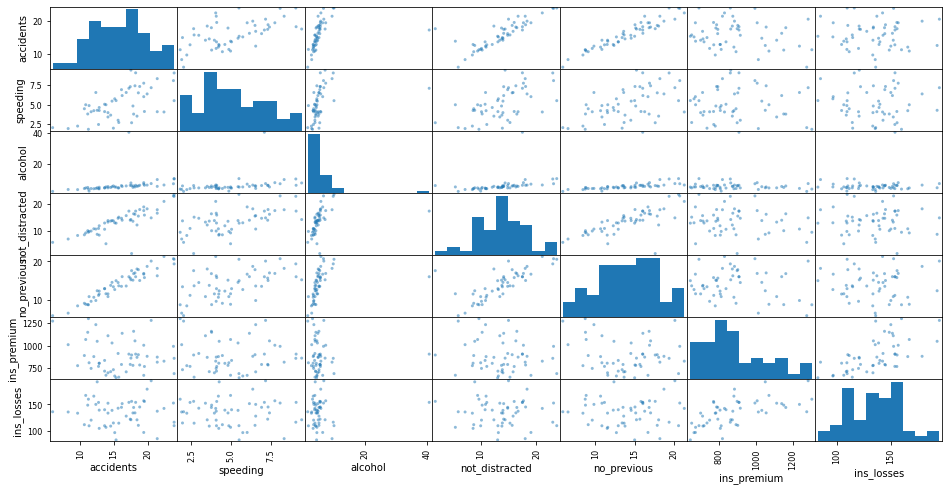

In [8]:
pd.plotting.scatter_matrix(crash,figsize=(16,8))

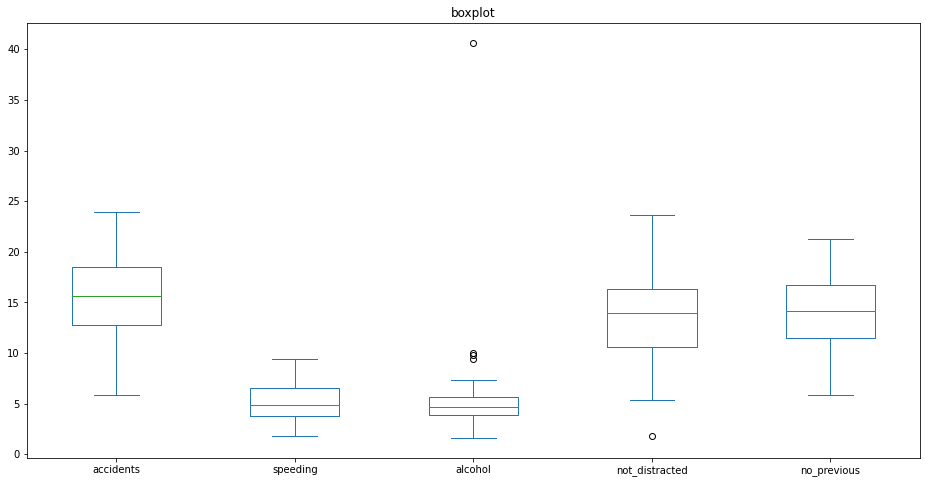

In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_col = crash.select_dtypes(include=numerics).columns.tolist()
ax = crash[num_col[:-2]].plot(kind='box', title='boxplot',figsize=(16,8))
plt.show()

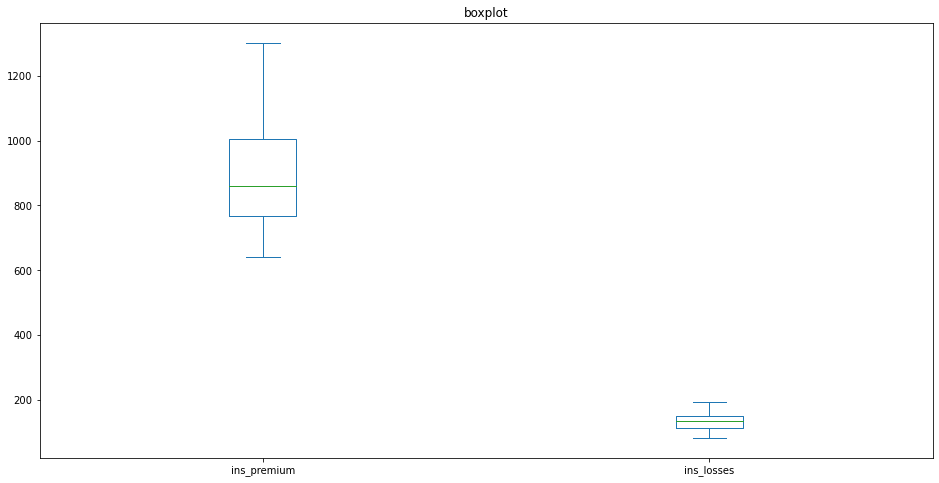

In [10]:
ax = crash[num_col[-2:]].plot(kind='box', title='boxplot',figsize=(16,8))
plt.show()

Alot of outliers in 'alcohol' and 'not distracted' column

## Question 4. Display and Remove (the real) outliers

**Type in your code here**

In [11]:
crash.alcohol.describe()

count    52.000000
mean      5.574385
std       5.245624
min       1.593000
25%       3.897000
50%       4.629000
75%       5.640500
max      40.642000
Name: alcohol, dtype: float64

In [12]:
crash.alcohol.median()

4.629

<AxesSubplot:>

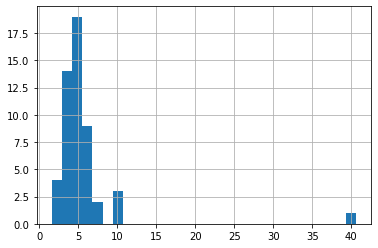

In [13]:
crash.alcohol.hist(bins=30)

In [14]:
crash.not_distracted.describe()

count    52.000000
mean     13.648154
std       4.497172
min       1.760000
25%      10.611000
50%      13.908000
75%      16.334500
max      23.661000
Name: not_distracted, dtype: float64

<AxesSubplot:>

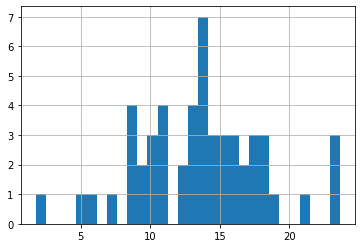

In [15]:
crash.not_distracted.hist(bins=30)

In [16]:
crash.loc[crash.alcohol > 15,'alcohol'] = crash.alcohol.median()


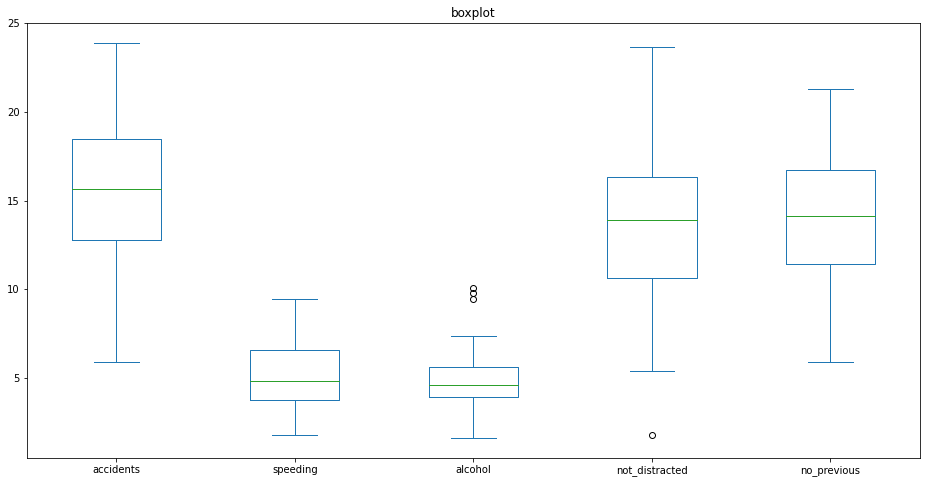

In [17]:
num_col = crash.select_dtypes(include=numerics).columns.tolist()
ax = crash[num_col[:-2]].plot(kind='box', title='boxplot',figsize=(16,8))
plt.show()

Maybe should keep alcohol outliers because of its distribution structure

## Question 5. Calculate the average speeding in usa and Northeast region using SQL

**Type in your code here**

In [18]:
avg_speeding = 'select "Northeast",avg(speeding) as avg from crash where region = "Northeast"'
ps.sqldf(avg_speeding)

,"""Northeast""",avg
0,Northeast,4.661111


## Question 6. Calculate the average alcohol for each region using SQL

**Type in your code here**

In [19]:
avg_alcohol = 'select region,avg(alcohol) as avg from crash group by "region"'
ps.sqldf(avg_alcohol)

,region,avg
0,Midwest,4.996917
1,Northeast,3.934556
2,South,5.414647
3,Territory,4.629000
4,West,4.754077


## Question 7. Calculate the number of occurrences, mean, min, max of the speeding for each divison using SQL

**Type in your code here**

In [20]:
desc = 'select division,avg(speeding) as avg,min(speeding) as min,max(speeding) as max,count(speeding) as occ from crash group by "division"'
ps.sqldf(desc)

,division,avg,min,max,occ
0,East North Central,4.106600,3.384,4.968,5
1,East South Central,4.533250,2.640,7.332,4
2,Middle Atlantic,5.814667,1.792,9.100,3
3,Mountain,5.812250,3.496,8.346,8
4,New England,4.084333,1.886,5.738,6
5,Pacific,5.949400,4.200,9.450,5
6,South Atlantic,5.030444,2.006,9.082,9
7,Territory,7.100000,7.100,7.100,1
8,West North Central,4.293429,1.937,6.923,7
9,West South Central,6.333750,4.032,7.760,4


## Question 8. Answer Question 7 but use Pandas functions

**Type in your code here**

In [21]:
crash.groupby('division').agg({'speeding':['count','min','max','mean']})

speeding                        
                      count    min    max      mean
division                                           
East North Central        5  3.384  4.968  4.106600
East South Central        4  2.640  7.332  4.533250
Middle Atlantic           3  1.792  9.100  5.814667
Mountain                  8  3.496  8.346  5.812250
New England               6  1.886  5.738  4.084333
Pacific                   5  4.200  9.450  5.949400
South Atlantic            9  2.006  9.082  5.030444
Territory                 1  7.100  7.100  7.100000
West North Central        7  1.937  6.923  4.293429
West South Central        4  4.032  7.760  6.333750

## Question 9. Calculate the Standard deviation, Skew and Kurtosis for the accidents, speeding, alcohol for each region

**Type in your code here**

In [22]:
crash.loc[crash.region == 'Territory']

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
39,17.2,7.1,4.629,17.472,16.016,905.99,153.86,PR,Territory,Territory


In [23]:
from scipy.stats import kurtosis,skew
stats = [skew,kurtosis,np.std]
crash.groupby('region').agg({
    'speeding':stats,
    'alcohol':stats,
    'accidents':stats
})

speeding                       alcohol                      \
               skew  kurtosis       std      skew  kurtosis       std   
region                                                                  
Midwest    0.105489 -0.925423  1.537451  1.822129  3.061283  1.824432   
Northeast  0.545403 -0.288152  2.289981  0.783350  0.104904  0.828121   
South      0.156468 -1.301447  2.220711  0.301037  1.216560  1.773576   
Territory  0.000000 -3.000000       NaN  0.000000 -3.000000       NaN   
West       0.614240 -0.733334  1.803138  1.021399  1.024489  1.910356   

          accidents                      
               skew  kurtosis       std  
region                                   
Midwest    0.827604  0.839429  3.588988  
Northeast  0.682327  0.031080  2.879284  
South     -1.023960  1.022963  4.537037  
Territory  0.000000 -3.000000       NaN  
West       0.057086 -1.115215  3.325118

## Question 10. Plot the histogram of accidents distribution for different region using 5 bins

**Type in your answer here**

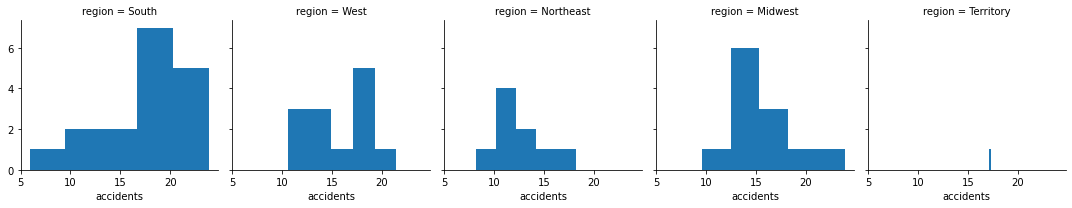

In [24]:
g = sns.FacetGrid(crash,col='region')
g = g.map(plt.hist,'accidents',bins=5)

### Now Load a different dataset (MPG dataset number 3)

In [25]:
mpg = pd.read_csv(mpg3)
print(mpg.shape)
mpg.head()

(405, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino


# Question 11: Check to see if there are any missing values. Fix the missing values by imputing value from the mean.

### Type your code here to fix the missing values by imputing value from the mean

In [26]:
mpg.isna().any()

mpg              True
cylinders       False
displacement    False
horsepower       True
weight           True
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [27]:
mpg.mpg.fillna(mpg.mpg.mean(), inplace=True)
mpg.horsepower.fillna(mpg.horsepower.mean(), inplace=True)
mpg.weight.fillna(mpg.weight.mean(), inplace=True)

In [28]:
mpg.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool